In [1]:
from processor.processor import DataModule

predictors_path = "../data/color/"
targets_path = "../data/gray/"
batch_size = 32
data_module = DataModule(predictors_dir=predictors_path, targets_dir=targets_path, batch_size=batch_size)

/home/kamil/miniconda3/envs/data-science/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/kamil/miniconda3/envs/data-science/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
train_loader = data_module.train_dataloader()
val_loader = data_module.val_dataloader()
test_loader = data_module.test_dataloader()

In [3]:
X, y = next(iter(train_loader))
X.shape, y.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32, 1, 224, 224]))

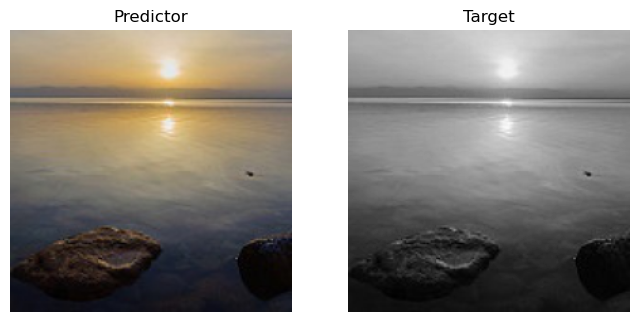

In [9]:
data_module.plot_sample(78)